In [1]:
import tifffile as tiff
from octvision3d.utils import get_filenames
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

In [2]:
# path = "/home/mstudxk5/Downloads/DRU/nnUNet_Dataset_v3/imagesTr"
# label_path = "/home/mstudxk5/Downloads/DRU/nnUNet_Dataset_v3/labelsTr"

path = "/data/dkermany_data/OCT/nnUNet_raw/Iran_Kafieh_2013_nnUNet_Dataset/imagesTs"
label_path = "/data/dkermany_data/OCT/nnUNet_raw/Iran_Kafieh_2013_nnUNet_Dataset/labelsTs"

color_map = {
    1: "#80ae80",  # CNV
    2: "#f1d691",  # DRU
    3: "#b17a65",  # EX
    4: "#6fb8d2",  # FLU
    5: "#d8654f",  # GA
    6: "#dd8265",  # HEM
    7: "#90ee90",  # RPE
    8: "#a200ff",  # RET
    9: "#8f8f70",  # CHO
    10: "#e1f0fd", # VIT
    11: "#75fafd", # HYA
    12: "#b0fdd1", # SHS
    13: "#fdfd54", # ART
    14: "#387df8", # ERM
    15: "#643200", # SES
}

label_map = {
    1: "CNV",
    2: "DRU",
    3: "EX",
    4: "FLU",
    5: "GA",
    6: "HEM",
    7: "RPE",
    8: "RET",
    9: "CHO",
    10: "VIT",
    11: "HYA",
    12: "SHS",
    13: "ART",
    14: "ERM",
    15: "SES"
}


In [3]:
def plot_bar_graph(label_map, label_count, color_map, log=False, save=False, suffix=""):
    # Custom formatting to remove the '+' and leading zero from the exponent, and skip zero values
    def format_scientific(value):
        if value == 0:
            return ""  # Return an empty string for zero values to skip labeling
        formatted = f"{value:.1e}".replace("+", "")  # Remove the "+"
        if 'e0' in formatted:
            formatted = formatted.replace("e0", "e")  # Remove "0" in the exponent
        return formatted
    
    # Helper function to create a single bar plot
    def create_barplot(ax, yscale='linear'):
        barplot = sns.barplot(
            x=list(label_map.values()),
            y=list(label_count.values()),
            hue=list(label_map.values()),
            palette=list(color_map.values()),
            dodge=False,
            legend=False,
            ax=ax
        )
        # Add values on top of each bar in scientific notation with custom formatting
        for container in barplot.containers:
            barplot.bar_label(container, labels=[format_scientific(v) for v in container.datavalues])
        
        ax.set_xlabel('Value')
        ax.set_ylabel(f'Count {"(Log Scale)" if yscale == "log" else ""}')
        ax.set_yscale(yscale)
        ax.set_title(f'Pixel Counts in Kafieh et. al. Dataset{" (Log Scale)" if yscale == "log" else ""}')

    # Plot depending on log argument
    if log:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        create_barplot(axes[0], yscale='linear')
        create_barplot(axes[1], yscale='log')
    else:
        fig, ax = plt.subplots(figsize=(8, 6))
        create_barplot(ax, yscale='linear')

    # Save the plot as an SVG file
    if save:
        if len(suffix) > 0:
            suffix = f"_{suffix}"
        output_path = os.path.join(os.path.expanduser("~"), "Downloads", f"pixel_count{suffix}.svg")
        plt.savefig(output_path, format="svg")

    # Show the plot
    plt.tight_layout()
    plt.show()

In [4]:
total_label_count = { i: 0 for i in range(1, 16) }

Plotting Iran_Kafieh_2013_ERM_1_0000.tif pixels


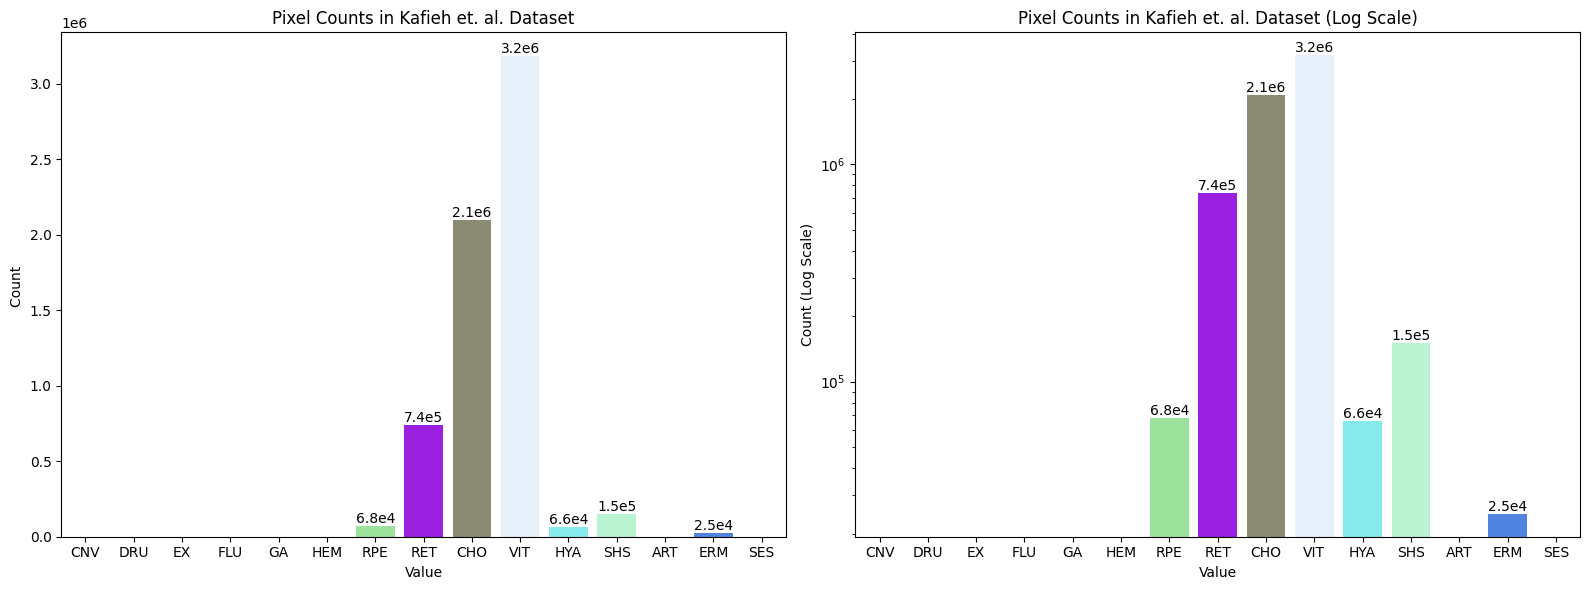

Plotting Iran_Kafieh_2013_ERM_2_0000.tif pixels


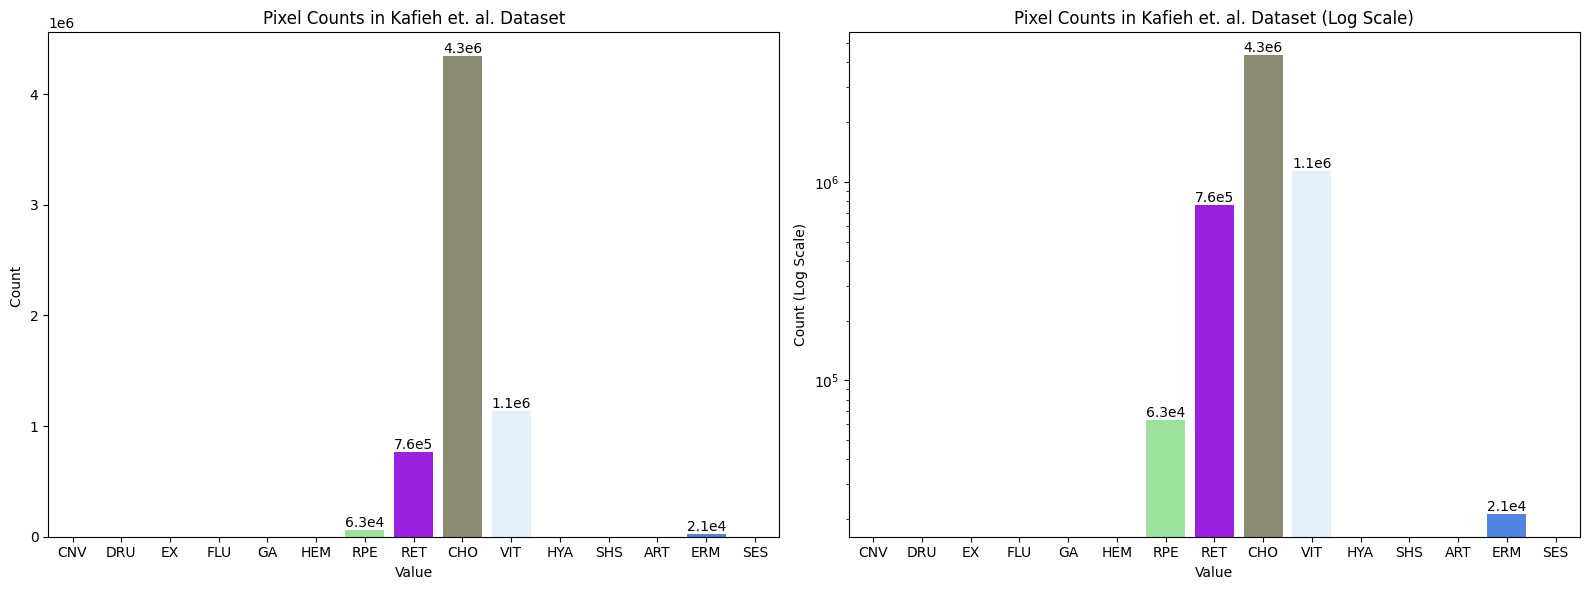

Plotting Iran_Kafieh_2013_ERM_4_0000.tif pixels


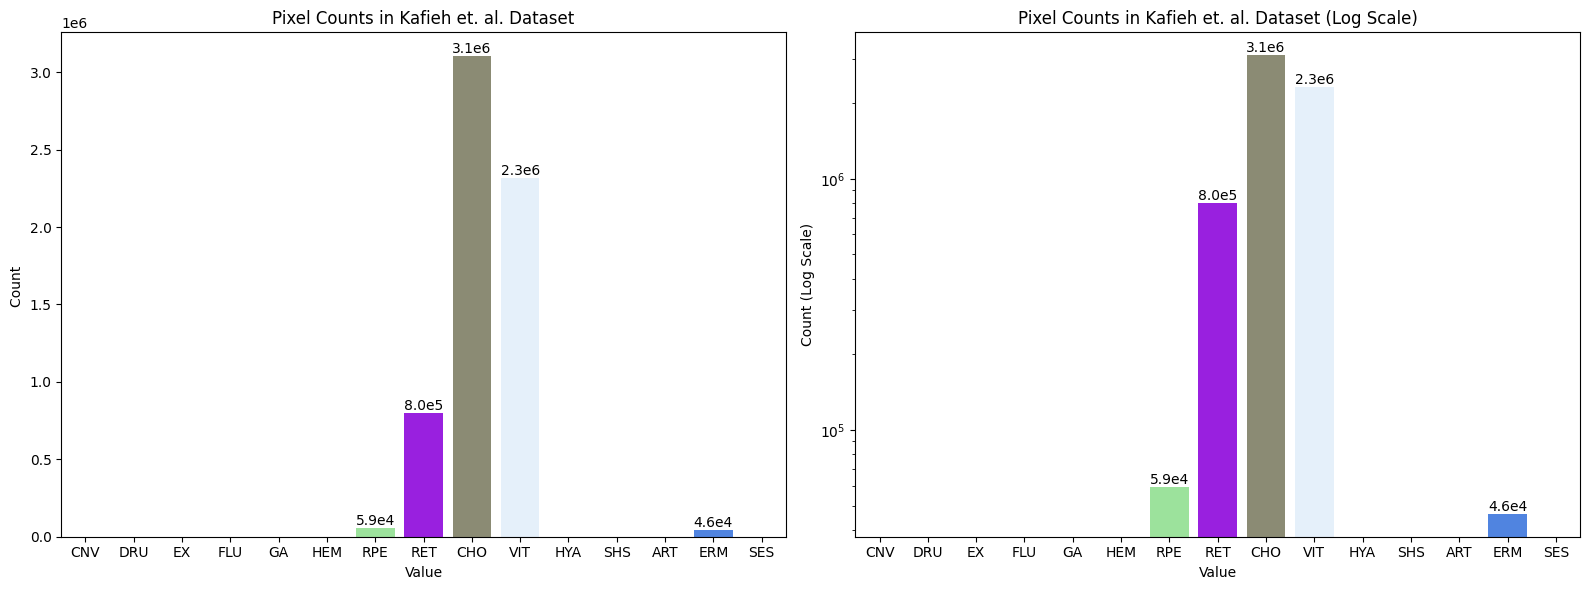

Plotting Iran_Kafieh_2013_ERM_5_0000.tif pixels


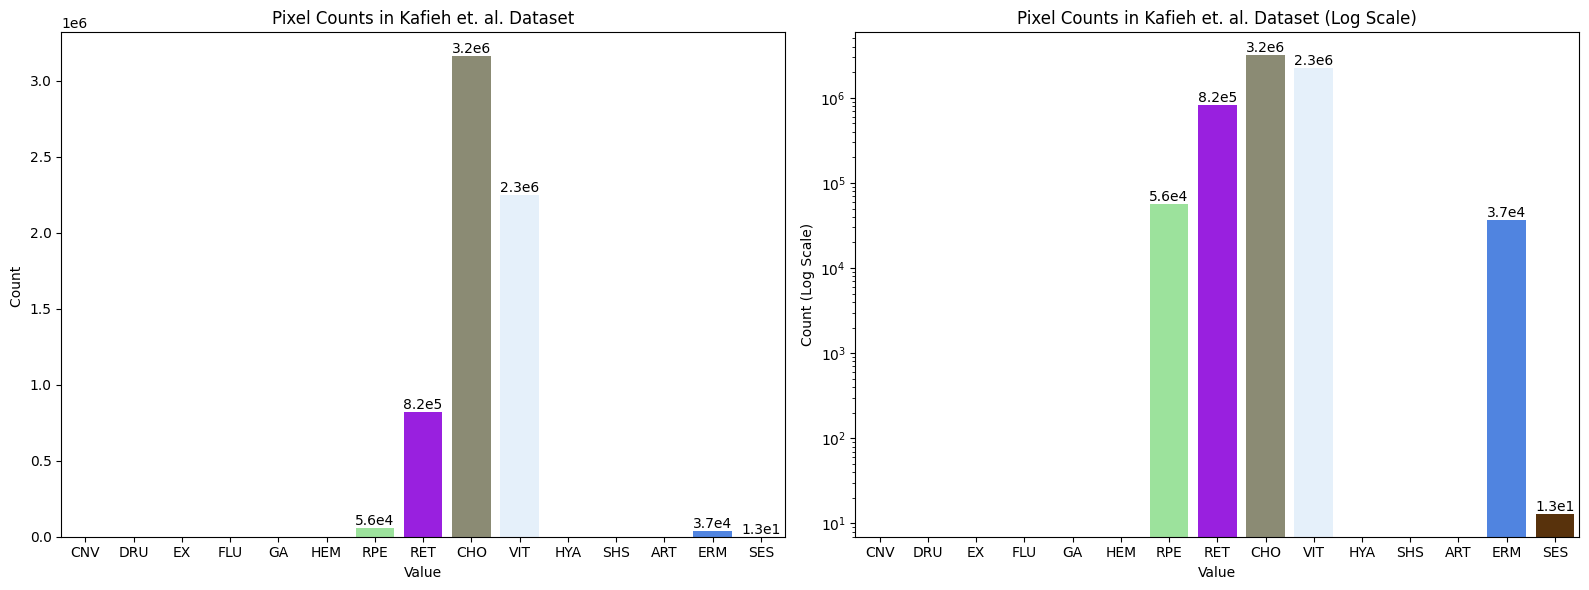

Plotting Iran_Kafieh_2013_ERM_6_0000.tif pixels


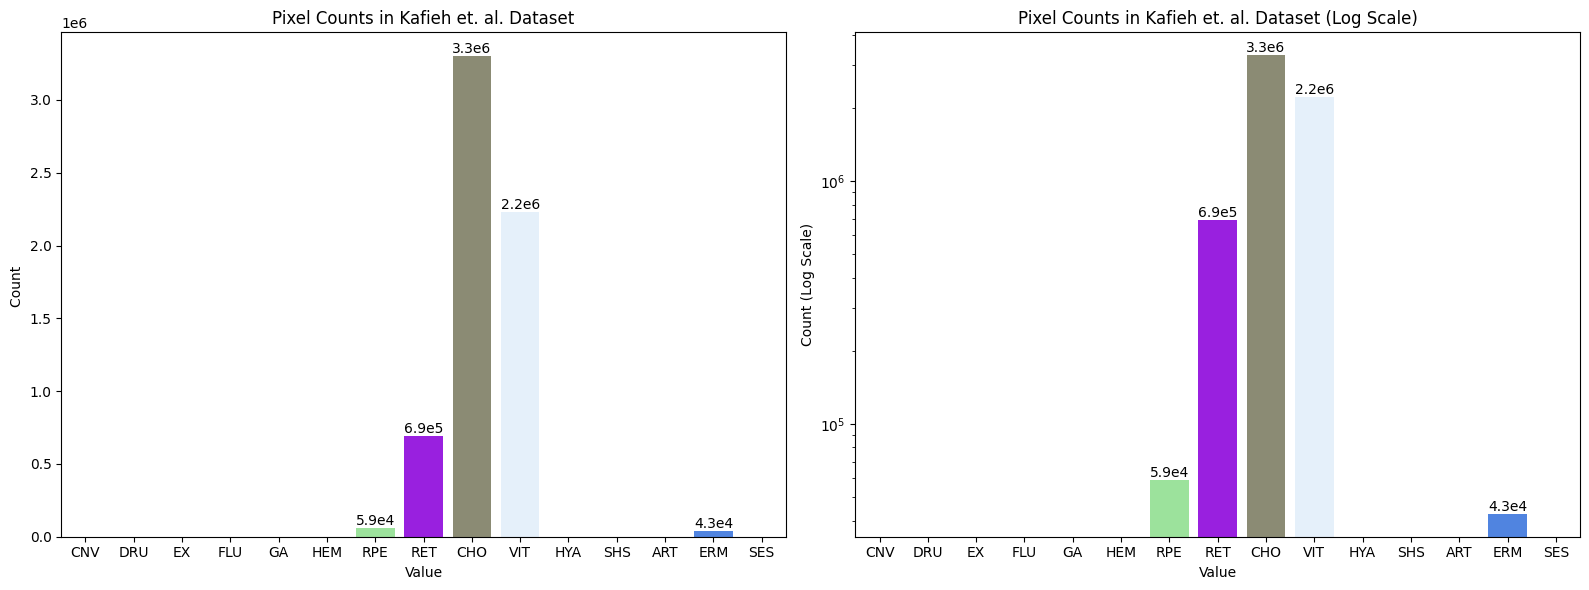

Plotting Iran_Kafieh_2013_ERM_7_0000.tif pixels


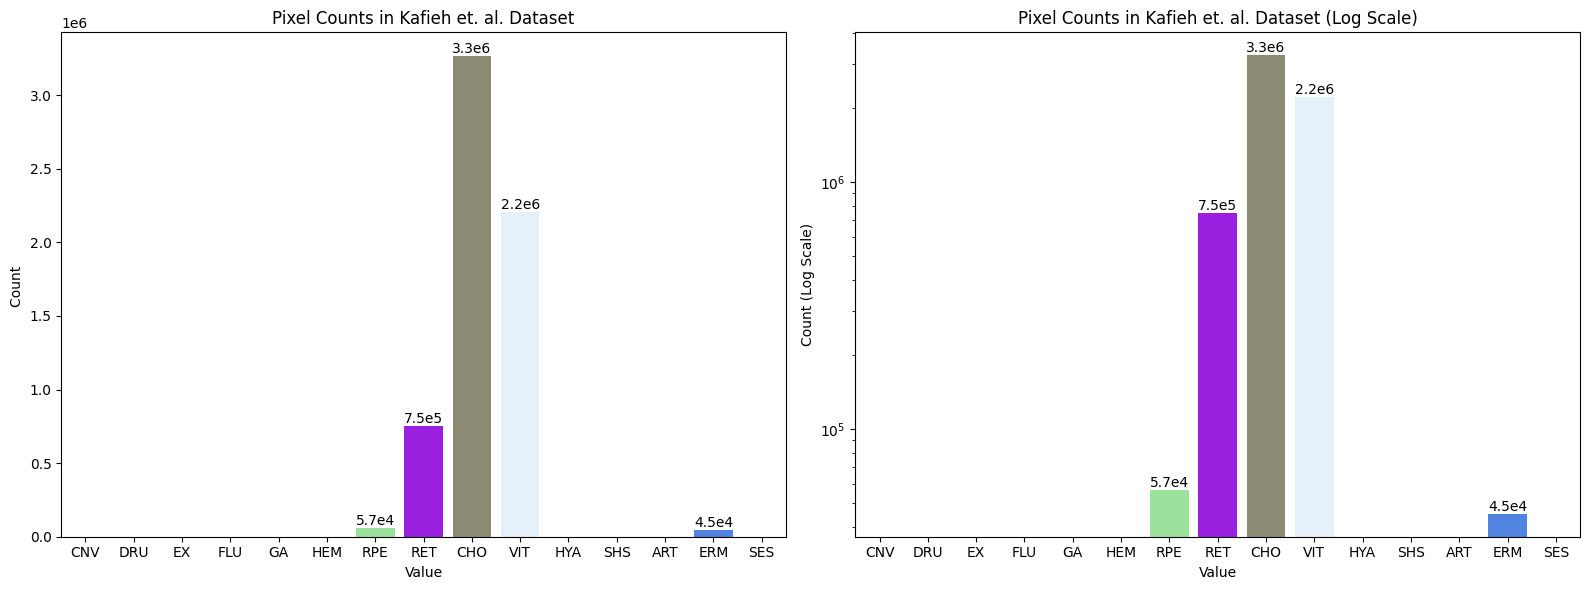

Plotting Iran_Kafieh_2013_ERM_12_0000.tif pixels


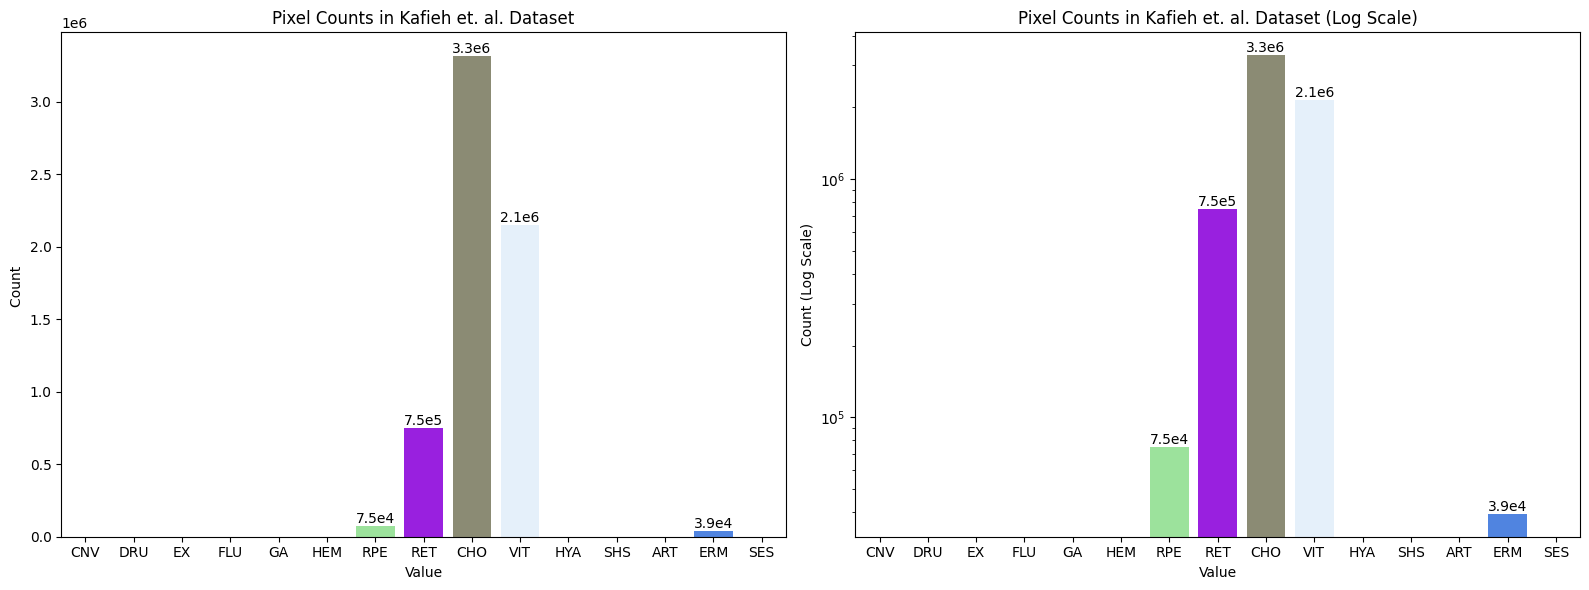

Plotting Iran_Kafieh_2013_NORMAL_8_0000.tif pixels


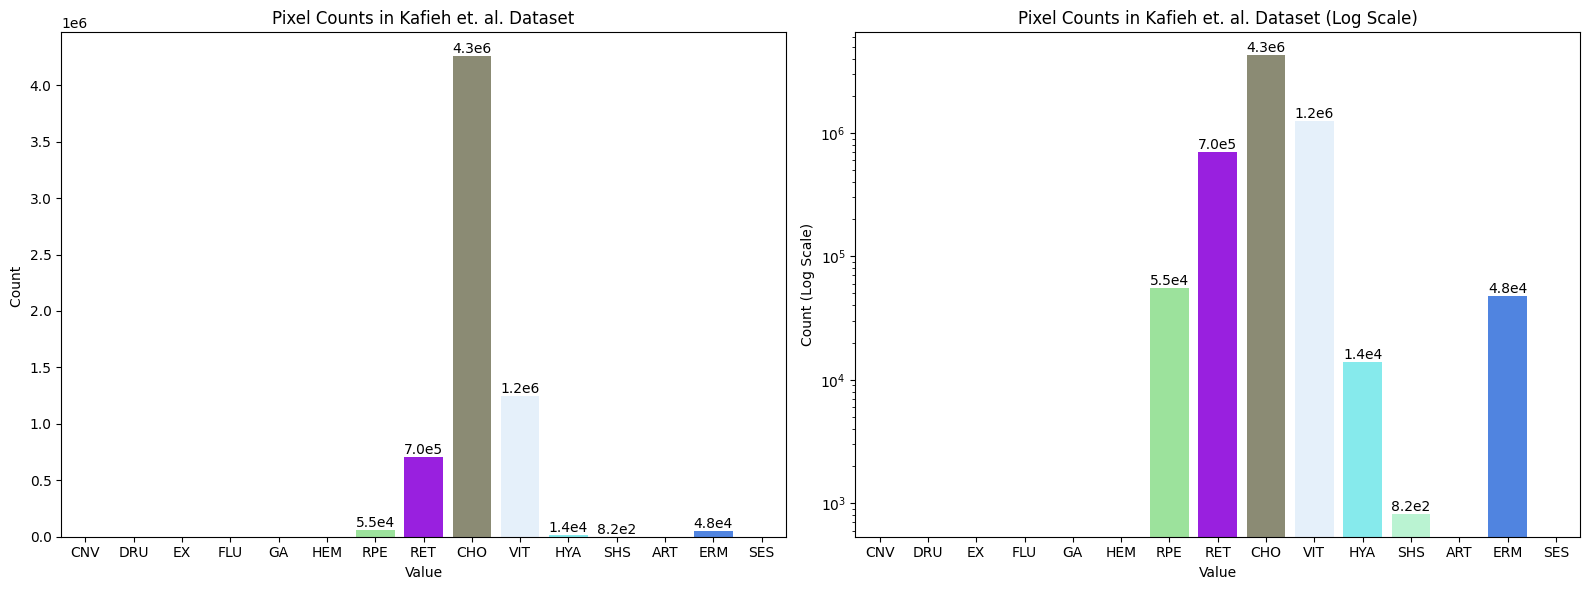

Plotting Iran_Kafieh_2013_NORMAL_9_0000.tif pixels


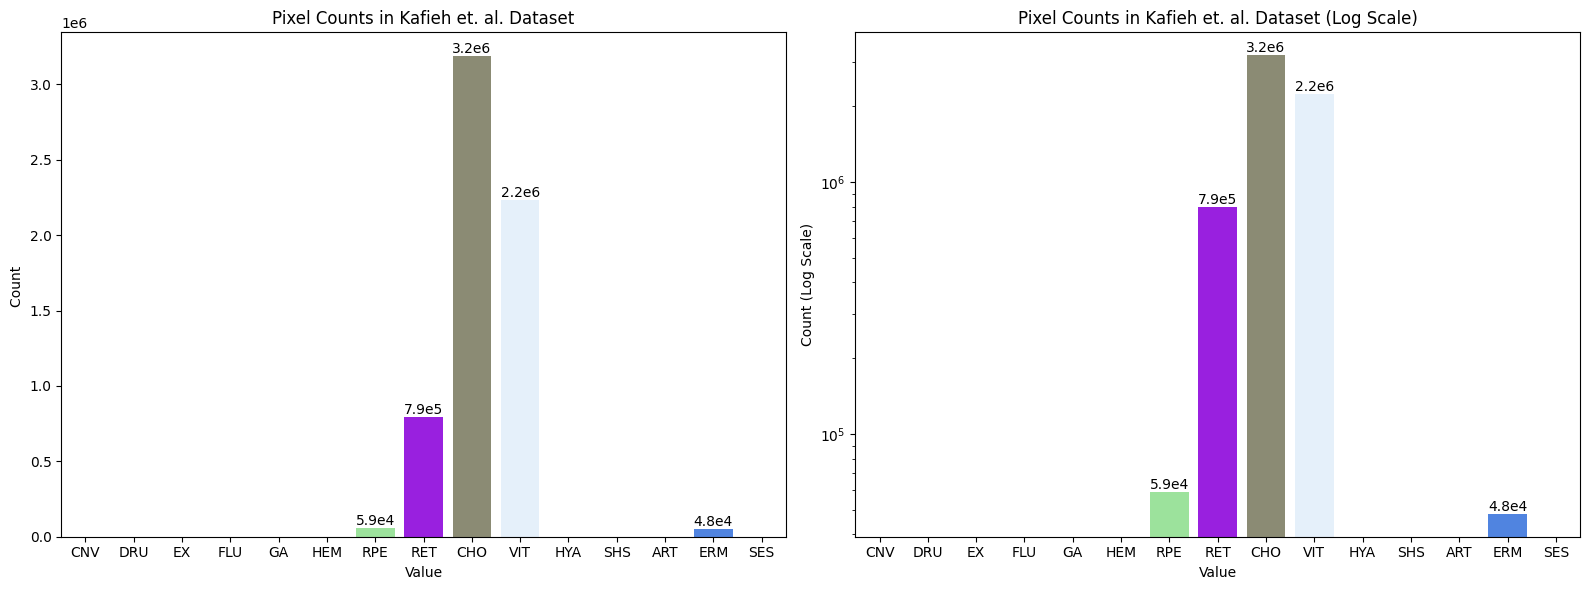

Plotting Iran_Kafieh_2013_NORMAL_10_0000.tif pixels


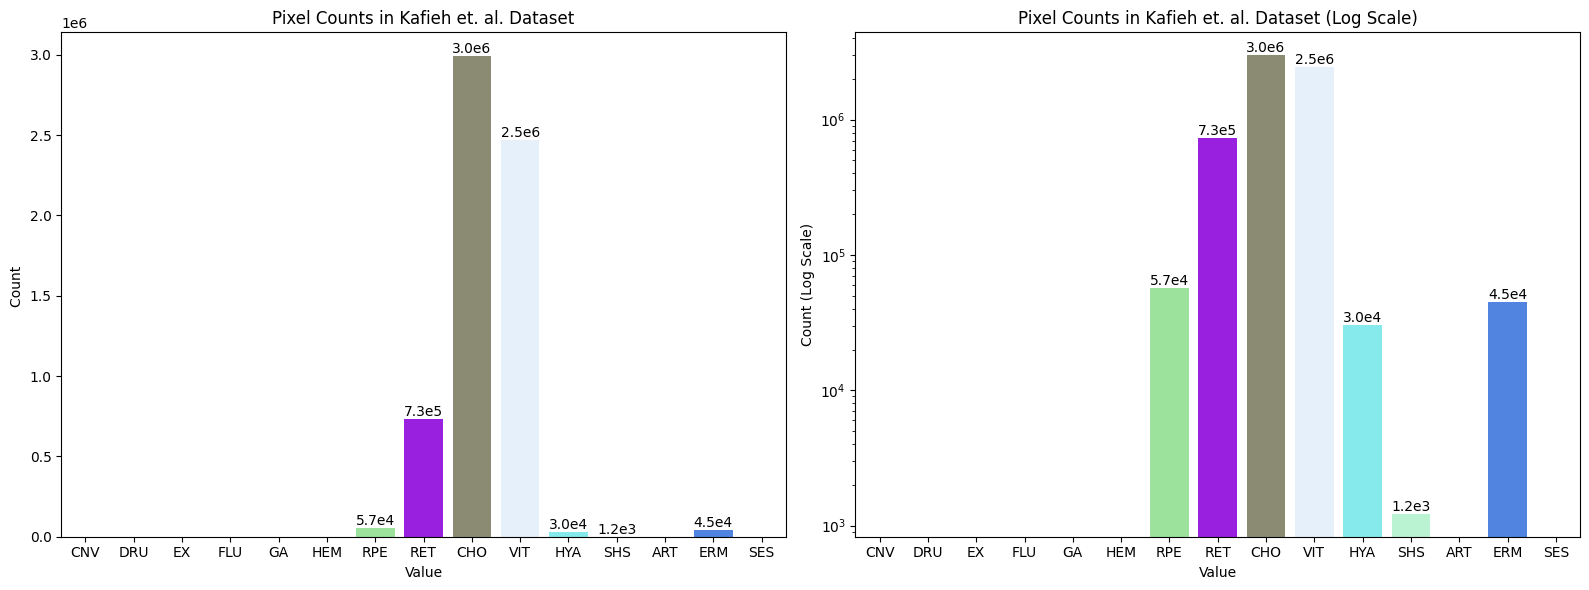

Plotting Iran_Kafieh_2013_NORMAL_11_0000.tif pixels


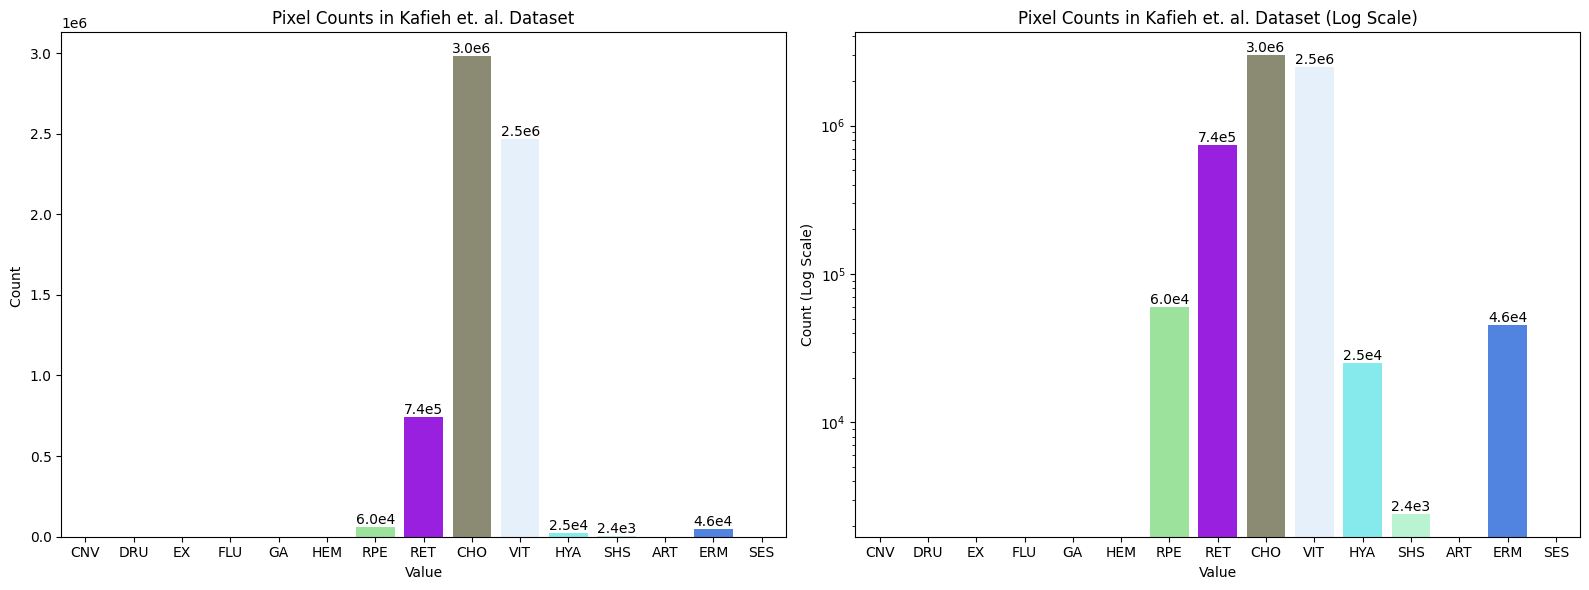

Plotting Iran_Kafieh_2013_NORMAL_13_0000.tif pixels


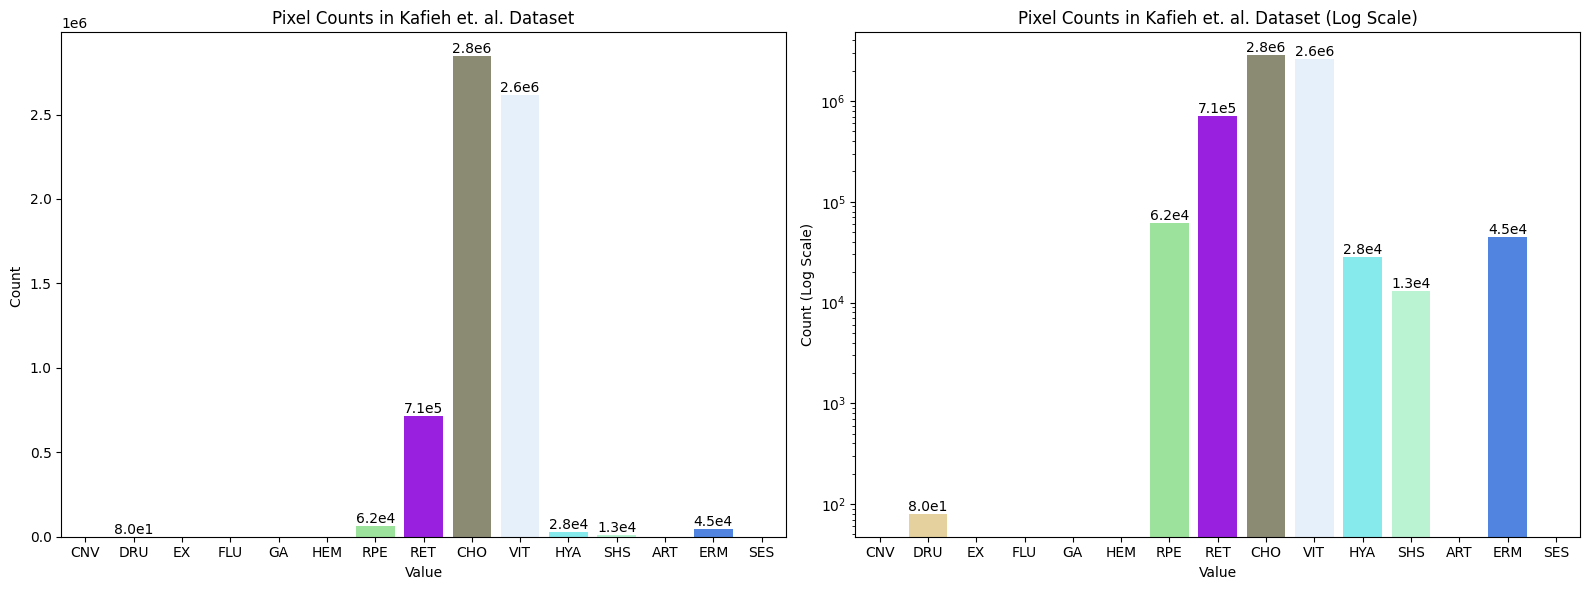

Plotting Iran_Kafieh_2013_VMA_3_0000.tif pixels


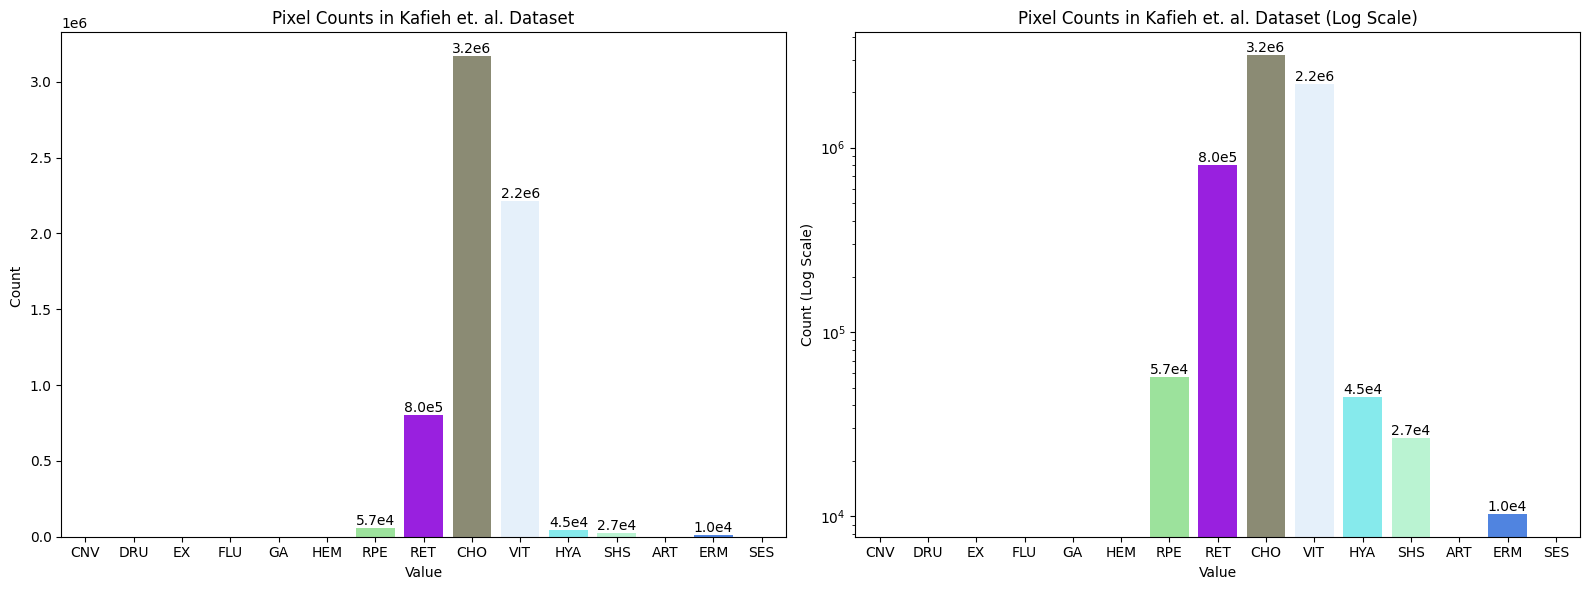

In [5]:
for f in get_filenames(path, "tif"):
    # pred_f = os.path.join(os.path.dirname(f), "predicted", "_".join(os.path.basename(f).split("_")[:-1])+".tif")
    label_f = os.path.join(label_path, "_".join(os.path.basename(f).split("_")[:-1])+".tif")

    print(f"Plotting {os.path.basename(f)} pixels")

    # pred = tiff.imread(pred_f)
    # orig = tiff.imread(f)
    label = tiff.imread(label_f)

    label_count = { i: 0 for i in range(1, 16) }

    unique_values, counts = np.unique(label, return_counts=True)
    for val, cnt in zip(unique_values, counts):
        label_count[val] = cnt
        total_label_count[val] += cnt

    plot_bar_graph(label_map, label_count, color_map, log=True)



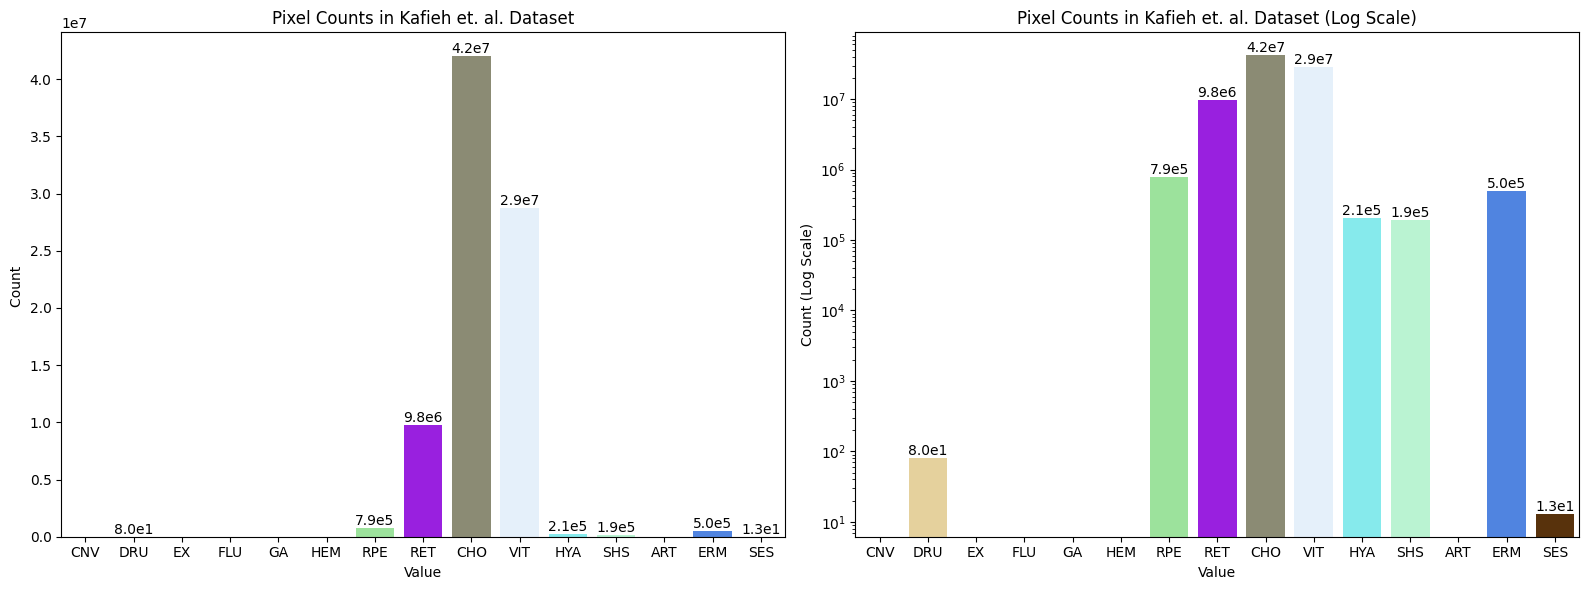

In [6]:
plot_bar_graph(label_map, total_label_count, color_map, log=True, save=True, suffix="total")